## Final Project Submission

Please fill out:
* Student name: COLLINS KANYIRI MWANGI
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Veronica Isiaho
* Blog post URL:


# Multiple Linear Regression: Predicting King County, WA, Housing Prices

## 1.0 BUSINESS UNDERSTANDING

### 1.1 Understanding the Problem

The role assumed here is of a Data Scientist working for Neocivil Realtors. The Agency is in the business of helping homeowners buy and/or sell houses. The Agency and the homeowners reside in King County in the US State of Washington. The Agency has provided me with a dataset of house sales in King County. The task here is to model the real estate housing prices and use the model to accurately predict the housing prices based on a number of features provided within the dataset. The expectation is that, once completed, the model can be used by them as a tool in selecting properties for investment in King County.

## 1.2 Analysis Questions

This analysis will seek to answer three questions about the data:

     Question 1: Which features are most highly correlated with price?

     Question 2: Which features have the strongest correlations with other predictor variables?

     Question 3: What combinations of features is the best fit, in terms of predictive power, for a multiple regression model to                  predict house prices based on provided historical data?
     

## 2.0 DATA UNDERSTANDING

id - unique identified for a house

date - Date house was sold

price - Price is prediction target

bedroomsNumber - of Bedrooms/House

bathroomsNumber - of bathrooms/bedrooms

sqft_livingsquare - footage of the home

sqft_lotsquare - footage of the lot

floorsTotal - floors (levels) in house

waterfront - House which has a view to a waterfront

view - Has been viewed

condition - How good the condition is ( Overall )

grade - overall grade given to the housing unit, based on King County grading system

sqft_above - square footage of house apart from basement

sqft_basement - square footage of the basement

yr_built - Built Year

yr_renovated - Year when house was renovated

zipcode - zip

lat - Latitude coordinate

long - Longitude coordinate

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## 3.0 DATA PREPARATION

### 3.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


### 3.2 Load and Exploring the data

In [2]:
# load the data
df = pd.read_csv('data/kc_house_data.csv')
# Preview of the first and last rows of the dataset
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
# Checked to see the datatype, number of columns and rows of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Most of the data types are numeric though we have a few object data types. The total number of rows is 21,597 and the number of columns in 21

In [4]:
# Checked the number of unique values for each column
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

There seems to be some repeated values in the id column.

In [5]:
# perform a statistical summary of the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Count: The count of non-null values in each column. It gives you an idea of missing values or potential data quality issues.

Mean: The average value of each column. It provides a measure of central tendency and can give you a sense of the typical value.

Standard Deviation: The measure of the spread or variability of each column's values around the mean. It indicates how dispersed the data points are.

Minimum and Maximum: The smallest and largest values in each column. It gives you the range of the data and helps identify potential outliers.

Quartiles (25%, 50%, and 75%): These values divide the data into four equal parts. The 50th percentile (median) represents the middle value, while the 25th and 75th percentiles indicate the lower and upper quartiles, respectively. They provide insights into the data's distribution and skewness.

In [6]:
# check the toal number of null values in each column
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The columns waterfront, view and yr_renovated have 2376, 63 and 3842 null values respectively.

## 4.0 DATA CLEANING

### 4.1 Missing Values

In [7]:
# A look at the percentage of missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        perc = (df[col].isnull().sum()/len(df[col]))*100
        print("The column", col,"has",df[col].isnull().sum(),"missing values, which is", round(perc, 1),"% of it's total")

The column waterfront has 2376 missing values, which is 11.0 % of it's total
The column view has 63 missing values, which is 0.3 % of it's total
The column yr_renovated has 3842 missing values, which is 17.8 % of it's total


#### Waterfront Column

In [8]:
print(df['waterfront'].unique(),"\n")

[nan 'NO' 'YES'] 



The unique values are nan, NO and YES.

In [9]:
print(df['waterfront'].value_counts(),"\n")

waterfront
NO     19075
YES      146
Name: count, dtype: int64 



The most common value in this column is NO with 19075 entries while YES has only 146. This means most of these houses don't have a waterfront hence it's safe to assume that the ones with missing values also don't have a waterfront. Therefore, I will replace the missing values with NO.

In [10]:
# replace missing values with 'NO'
df['waterfront'].fillna('NO',inplace=True)

# confirm if the missing values have been replaced
df['waterfront'].value_counts()

waterfront
NO     21451
YES      146
Name: count, dtype: int64

The NO entries have increased from 19075 to 21451  

In [11]:
# check data type 
df['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

We can see that waterfront is of type object. This is not compatible for our model hence I need to convert it to type int. Before changing the datatype, I first need to change the column to a binary column with 1 == YES and 0 == NO

In [12]:

# replace the values 'NO' and 'YES' with '0' and '1' respectively
df['waterfront'].replace({'NO': 0, 'YES': 1}, inplace=True)

#convert column to data type 'int'
df['waterfront'].astype(int)

#confirm if change occured
df['waterfront'].unique()

array([0, 1], dtype=int64)

The values have now changed to 1s and 0s and the datatype is now integer

#### View Column

In [13]:
print(df['view'].unique(),"\n")

['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR'] 



The unique values:
'NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR'
nan -- missing values

In [14]:
print(df['view'].value_counts(),"\n")

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64 



The most common value in this column is NONE. So this means most of the houses don't have a view. It's safe to assume the 63 missing values also don't have a view. Therefore, I will replace the missing values with NONE

In [15]:
print("Number of missing values:",df['view'].isnull().sum())

Number of missing values: 63


In [16]:
# replace missing values with 'NONE'
df['view'].fillna('NONE',inplace=True)

# confirm if the missing values have been replaced
df['view'].value_counts()

view
NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

In [17]:
df['view'].astype(str)

0        NONE
1        NONE
2        NONE
3        NONE
4        NONE
         ... 
21592    NONE
21593    NONE
21594    NONE
21595    NONE
21596    NONE
Name: view, Length: 21597, dtype: object

The number of 'NONE" entries has increased from 19422 to 19485 thus showing that the missing 63 vales have been replaced by NONE.

#### Year Renovated Column

In [18]:
print(df['yr_renovated'].unique(),"\n")

[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.] 



nan also exists in the unique values of this column. The years run from 1948 to 2014.

In [19]:
print(df['yr_renovated'].value_counts(),"\n")

yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64 



Number of distinct elements is: 70 
The most common value in this column is 0.0.
it's not possible to know what 0.0 stands for.

In [20]:
# replace missing values with '0.0'
df['yr_renovated'].fillna(0.0,inplace=True)

# confirm if the missing values have been replaced
df['yr_renovated'].value_counts()

yr_renovated
0.0       20853
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64

The number of missing values increased from 17011 to 20853

In [21]:
# counter checking to see if there are any more missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No more missing values in the data

### 4.2 Conversion

#### Conversion of Date Column

In [22]:
# split the date into month, day and year
date = df['date'].str.split('/', expand=True)

# create new columns for month and year and convert to integer
df['month_sold'] = date[0].astype(int)
df['yr_sold'] = date[2].astype(int)

# drop original date column
df.drop(columns=['date'], axis=1, inplace=True)

# check to see if changed were made
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,NONE,Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,NONE,Average,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,NONE,Very Good,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,NONE,Average,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015


#### Conversion of sqft_basement to Float/Int Type

In [23]:
#5. Change column sqft_basement datatype into float

df['sqft_basement'] = [float(x) if x != '?' else 0.0 for x in df['sqft_basement']]
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,NONE,Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,NONE,Average,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,NONE,Very Good,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,NONE,Average,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015


we replaced the ? with 0.0, and converted it to float type

In [24]:
#confirm if change occured
df['sqft_basement'].dtype

dtype('float64')

In [25]:
df['grade'].astype(str)

0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21597, dtype: object

In [26]:
df['condition'].astype(str)

0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21597, dtype: object

### Identify and deal with Outliers.

In [27]:
# explore the number of unique characters in each column.
df.nunique(axis = 0)

id               21420
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
month_sold          12
yr_sold              2
dtype: int64

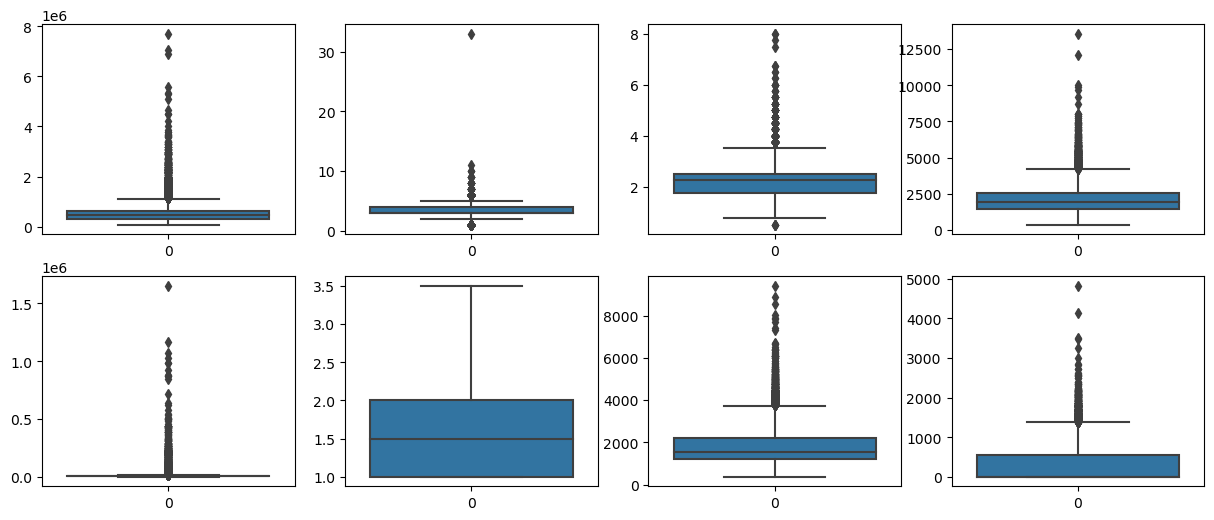

In [28]:
#plot the columns with more than single digits count.
fig, axs = plt.subplots(2,4, figsize = (15,6))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['bedrooms'], ax = axs[0,1])
plt3 = sns.boxplot(df['bathrooms'], ax = axs[0,2])
plt4 = sns.boxplot(df['sqft_living'], ax = axs[0,3])
plt5 = sns.boxplot(df['sqft_lot'], ax = axs[1,0])
plt1 = sns.boxplot(df['floors'], ax = axs[1,1])
plt2 = sns.boxplot(df['sqft_above'], ax = axs[1,2])
plt3 = sns.boxplot(df['sqft_basement'], ax = axs[1,3])
plt.savefig('./images/fig1.png')

The above figures show that there are multipal columns contain some outlier data.

In [29]:
to_modify = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','sqft_above','sqft_basement']
for col in to_modify:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

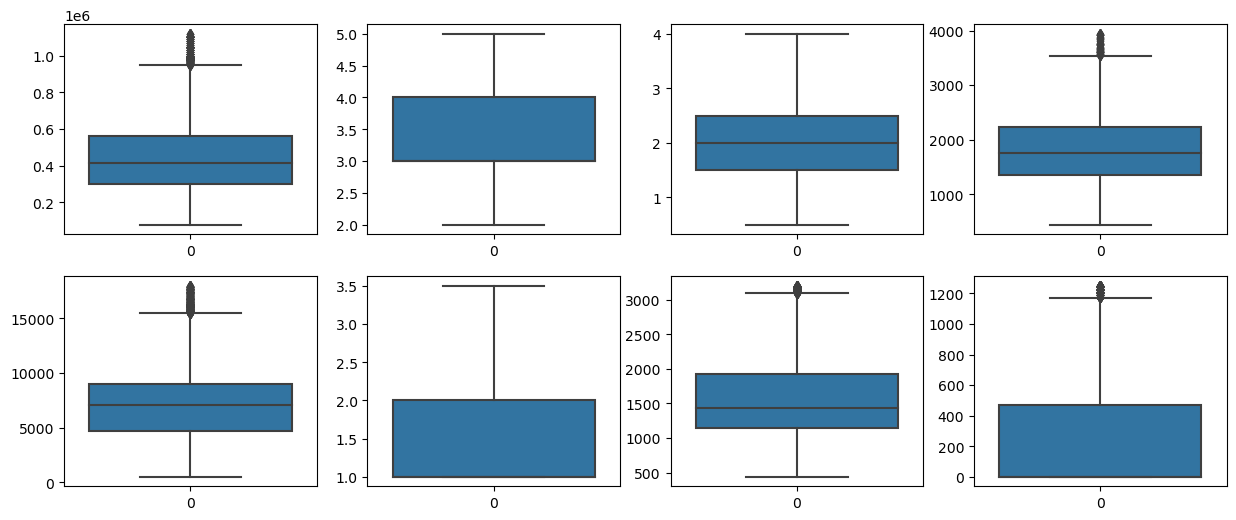

In [30]:
#Plot them again to check the results
# check the data after modification
fig, axs = plt.subplots(2,4, figsize = (15,6))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['bedrooms'], ax = axs[0,1])
plt3 = sns.boxplot(df['bathrooms'], ax = axs[0,2])
plt4 = sns.boxplot(df['sqft_living'], ax = axs[0,3])
plt5 = sns.boxplot(df['sqft_lot'], ax = axs[1,0])
plt1 = sns.boxplot(df['floors'], ax = axs[1,1])
plt2 = sns.boxplot(df['sqft_above'], ax = axs[1,2])
plt3 = sns.boxplot(df['sqft_basement'], ax = axs[1,3])
plt.savefig('./images/fig2.png')

In [31]:
#confirm if change occured
df.nunique(axis = 0)

id               16638
price             3067
bedrooms             4
bathrooms           15
sqft_living        670
sqft_lot          7009
floors               6
waterfront           2
view                 5
condition            5
grade                8
sqft_above         600
sqft_basement      162
yr_built           116
yr_renovated        67
zipcode             70
lat               4717
long               624
sqft_living15      586
sqft_lot15        6296
month_sold          12
yr_sold              2
dtype: int64

The outlier values were removed from the data.

In [32]:
# saving the cleaned data into a csv file
df.to_csv('data/cleaned_kchousing.csv', index=False)

### 5.0 STATISTICAL MODELING

#### 5.1 identify variable types

In [33]:
numeric_variables = df.select_dtypes("number")
numeric_variables

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5,2014
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2,2015
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,6,2014
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1,2015


In [34]:
#categorical_variables = df.select_dtypes("object")
#categorical_variables

In [35]:
print("Preview of the 'view' column")
print(df['view'].value_counts(),'\n')

print("Preview of the 'condition' column")
print(df['condition'].value_counts(),'\n')

print("Preview of the 'grade' column")
print(df['grade'].value_counts(),'\n')

Preview of the 'view' column
view
NONE         15714
AVERAGE        572
FAIR           220
GOOD           201
EXCELLENT       75
Name: count, dtype: int64 

Preview of the 'condition' column
condition
Average      10881
Good          4426
Very Good     1341
Fair           117
Poor            17
Name: count, dtype: int64 

Preview of the 'grade' column
grade
7 Average        8076
8 Good           4931
6 Low Average    1788
9 Better         1532
10 Very Good      267
5 Fair            164
11 Excellent       14
4 Low              10
Name: count, dtype: int64 



In [36]:
# create bar plots to visualize the categorical data
categorical_features = df.select_dtypes("object")
categorical_features

,view,condition,grade
0,NONE,Average,7 Average
1,NONE,Average,7 Average
2,NONE,Average,6 Low Average
3,NONE,Very Good,7 Average
4,NONE,Average,8 Good
...,...,...,...
21592,NONE,Average,8 Good
21593,NONE,Average,8 Good
21594,NONE,Average,7 Average
21595,NONE,Average,8 Good


#### 5.2 Checking Correlations

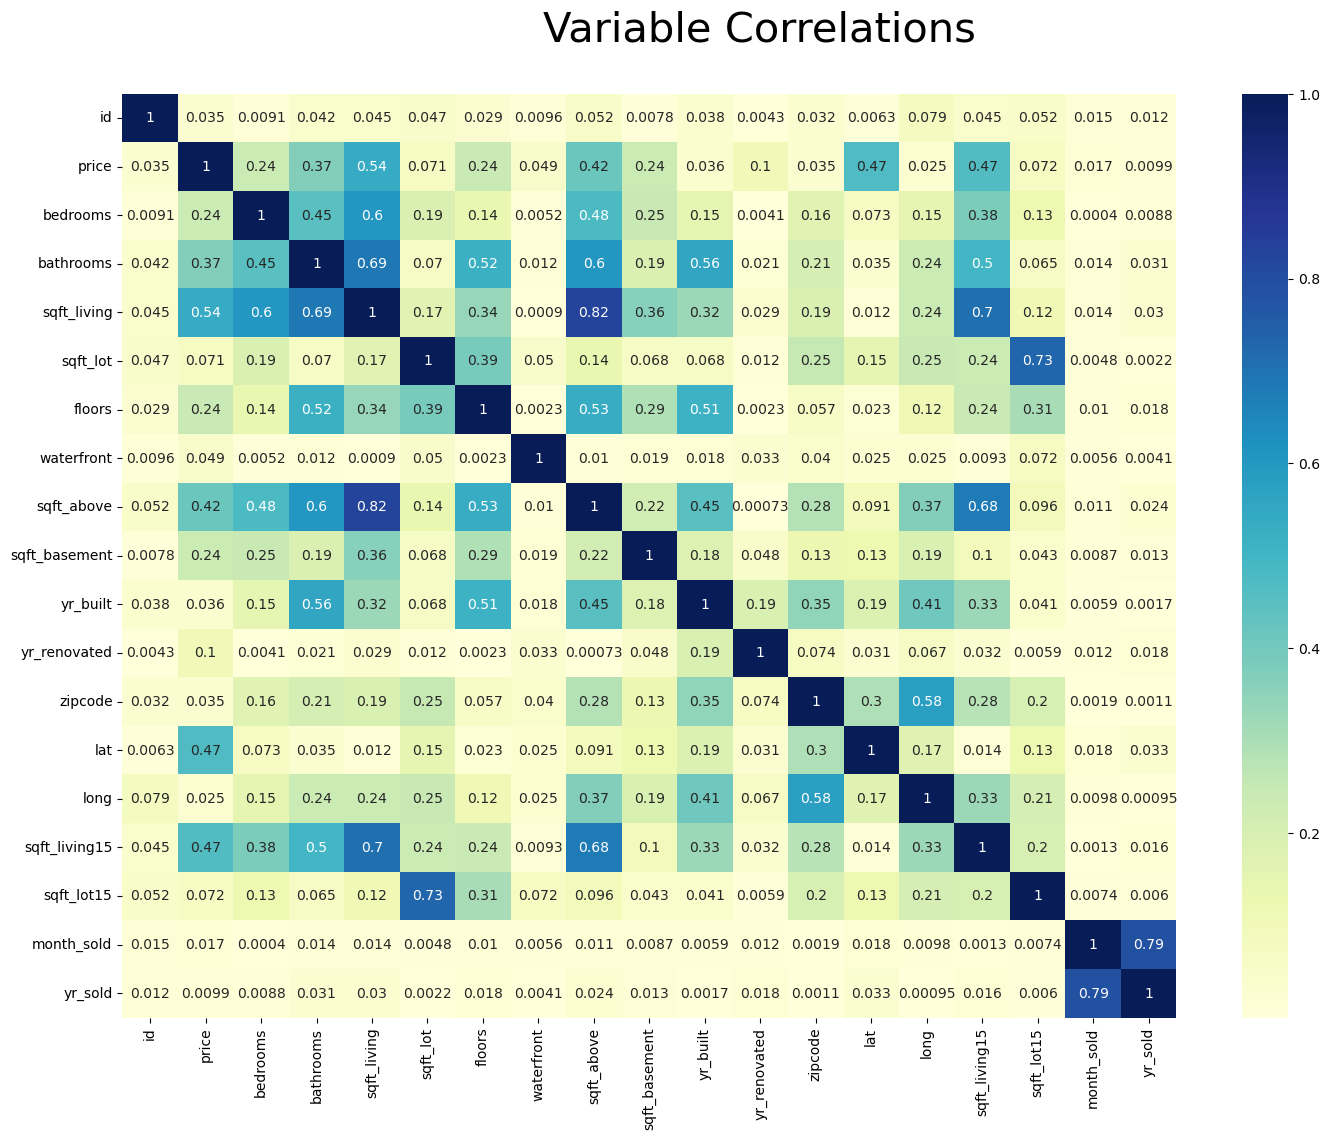

In [37]:
#View heatmap to get Variable Correlations
corr = numeric_variables.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95, fontname='DejaVu Sans')
heatmap = sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.savefig('images/Variable Correlations heatmap');
heatmap;

A correlation of 0.7 to 1.0 (-0.7 to -1) suggests a strong positive (negative) linear relationship while 0.5 to 0.6 (-0.5 to -0.6) is considered moderate.
many of the variables related to the size of homes (e.g. sqft_living, sqft_living15, etc) are strongly correlated with each other.

The target variable is price. Therefore, we look at the correlation coefficients for all of the predictor variables to find the one with the highest correlation with price.

In [38]:
# correlation of the independent variables in descending order
numeric_variables.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.536408
lat              0.472763
sqft_living15    0.467063
sqft_above       0.415782
bathrooms        0.370608
floors           0.243700
sqft_basement    0.237420
bedrooms         0.235948
yr_renovated     0.101976
waterfront       0.049043
id               0.035273
zipcode          0.035086
yr_sold          0.009876
month_sold      -0.017095
long            -0.025429
yr_built        -0.035736
sqft_lot        -0.070990
sqft_lot15      -0.071949
Name: price, dtype: float64

#### Question 1: Which features are most highly correlated with price?

sqft_living has the strongest positive correlation with price followed by 
 grade, sqft_living15, sqft_above and bathrooms in that order.
 NOTE. we do not use lat as its not needed in the analyisis
 

5.3.2 Plotting the sqft_living vs. Price

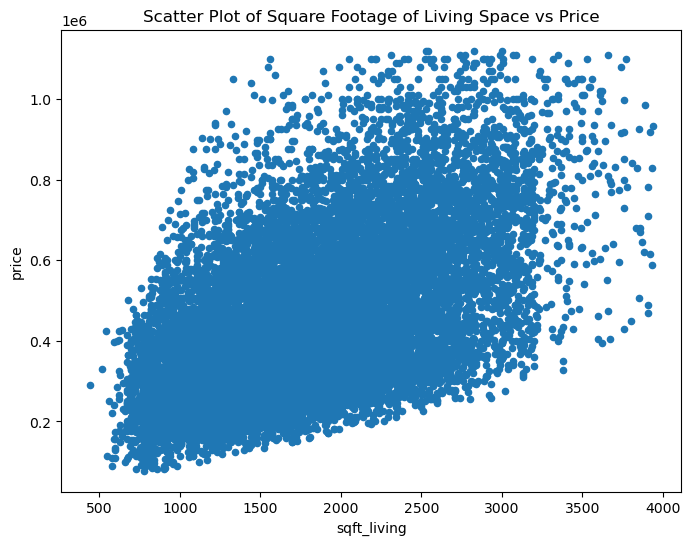

In [39]:
# create a scatter plot of sqft_living vs. price:
fig, ax = plt.subplots(figsize=(8,6))
df.plot.scatter(x='sqft_living', y='price', ax=ax)
plt.title('Scatter Plot of Square Footage of Living Space vs Price');
plt.savefig('images/fig3');


### 5.2 Simple Linear Regression Model

####  Setting Up Variables for Regression

Declaring y and X_base variables, where y is a Series containing price data and X_base is a DataFrame containing the column with the target variable.

In [40]:
y = df['price']

X_base = df['sqft_living']

#### Creating and Fitting Simple Linear Regression

In [41]:
base_model = sm.OLS(endog=y, exog=sm.add_constant(X_base))
base_results = base_model.fit()

In [42]:
#### Evaluate and Interpret Baseline Model Results
print(base_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     6779.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:17:26   Log-Likelihood:            -2.2507e+05
No. Observations:               16782   AIC:                         4.501e+05
Df Residuals:                   16780   BIC:                         4.502e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.442e+05   3925.379     36.732      

In [43]:
# calculate the mean absolute error
base_mae = mean_absolute_error(y, base_results.predict(sm.add_constant(X_base)))
base_mae

130267.37490037664

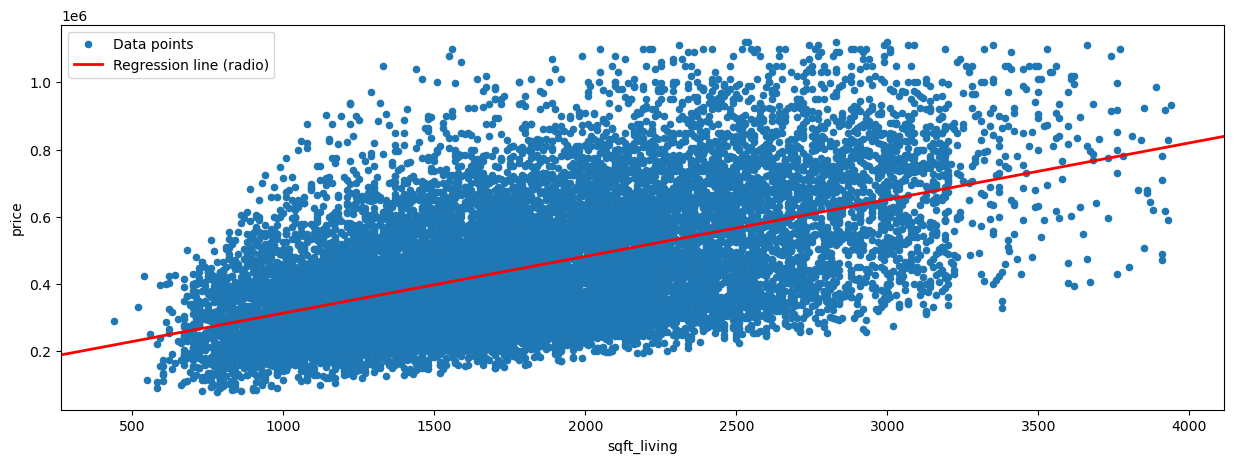

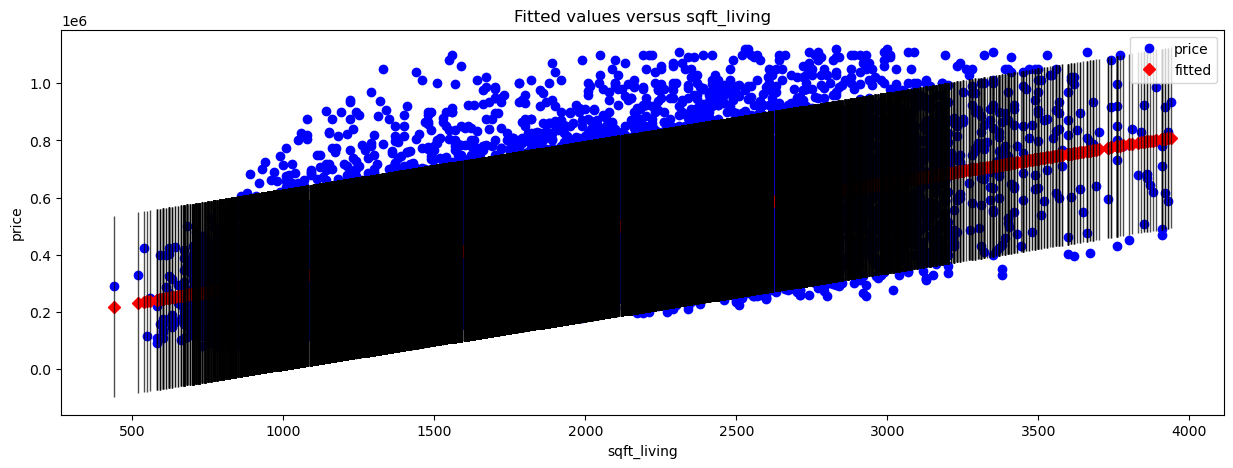

In [44]:
# Visualize model fit
fig, ax = plt.subplots(figsize=(15,5))
df.plot(x='sqft_living', y='price', kind="scatter", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=base_results, label="Regression line (radio)", c="red", linewidth=2, ax=ax)
ax.legend()
plt.savefig('images/model fit');
plt.show()

#Visualize fitted values
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.plot_fit(base_results, "sqft_living", ax=ax)
plt.savefig('images/fitted values');
plt.show()


#### Observations
Our model is statistically significant overall with a Prob (F-statistic) value of 0.00 which is less than the standard alpha 0.05. The model also explains about 29% of the variance in price. A higher variance is always preferred.

Both our intercept (const) and our coefficient for sqft_living are statistically significant with P>|t| values of 0.000 which are less than the standard alpha of 0.05.

Our intercept is about 144200, meaning that a home with 0 square feet of living area would cost about 144200$.

Our coefficient for sqft_living is about 169, which means that for each additional square foot of living area, we expect the price to increase by about 169$.

A mean absolute error (MAE) of 130267.37 means that our model is off by 130267$.

This means that the difference between the actual price and the predicted price is approximately 130267$ which is quite high. A lower MAE is always preferred.

### 5.3 Multiple Regression Modeling

####  Setting Up Variables for Regression

In [45]:
# variable representing all the highly correlated variables
X_multiple1 = df[["sqft_living", "grade", "sqft_living15", "sqft_above", "bathrooms"]]


#### Preprocessing Categorical Variable by One Hot-Encoding

In [46]:
 #one-hot encode the categorical column in X_iterated
X_multiple1 = pd.get_dummies(X_multiple1,columns=['grade'])
X_multiple = X_multiple1.replace({True: 1, False: 0})
X_multiple

,sqft_living,sqft_living15,sqft_above,bathrooms,grade_10 Very Good,grade_11 Excellent,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,1180,1340,1180,1.00,0,0,0,0,0,1,0,0
1,2570,1690,2170,2.25,0,0,0,0,0,1,0,0
2,770,2720,770,1.00,0,0,0,0,1,0,0,0
3,1960,1360,1050,3.00,0,0,0,0,0,1,0,0
4,1680,1800,1680,2.00,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1530,1530,2.50,0,0,0,0,0,0,1,0
21593,2310,1830,2310,2.50,0,0,0,0,0,0,1,0
21594,1020,1020,1020,0.75,0,0,0,0,0,1,0,0
21595,1600,1410,1600,2.50,0,0,0,0,0,0,1,0


#### Build a Multiple Linear Regression Model

Using the y variable from our base model and X_multiple1, we build a model called multiple1_model and a regression results object called multiple1_results.

In [48]:
multiple1_model = sm.OLS(y, sm.add_constant(X_multiple))
multiple1_results = multiple1_model.fit()

In [49]:
#### Evaluate and Interpret Multiple Linear Regression Model Results
print(multiple1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     999.8
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:17:57   Log-Likelihood:            -2.2369e+05
No. Observations:               16782   AIC:                         4.474e+05
Df Residuals:                   16770   BIC:                         4.475e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.018e+05   9

In [51]:
# calculate the mean absolute error
iterated_mae = mean_absolute_error(y, multiple1_results.predict(sm.add_constant(X_multiple1)))
base_mae, iterated_mae

(130267.37490037664, 117004.9747180911)

Since this is a higher dimensional model, we will use partial regression plots, one for each of our predictors.

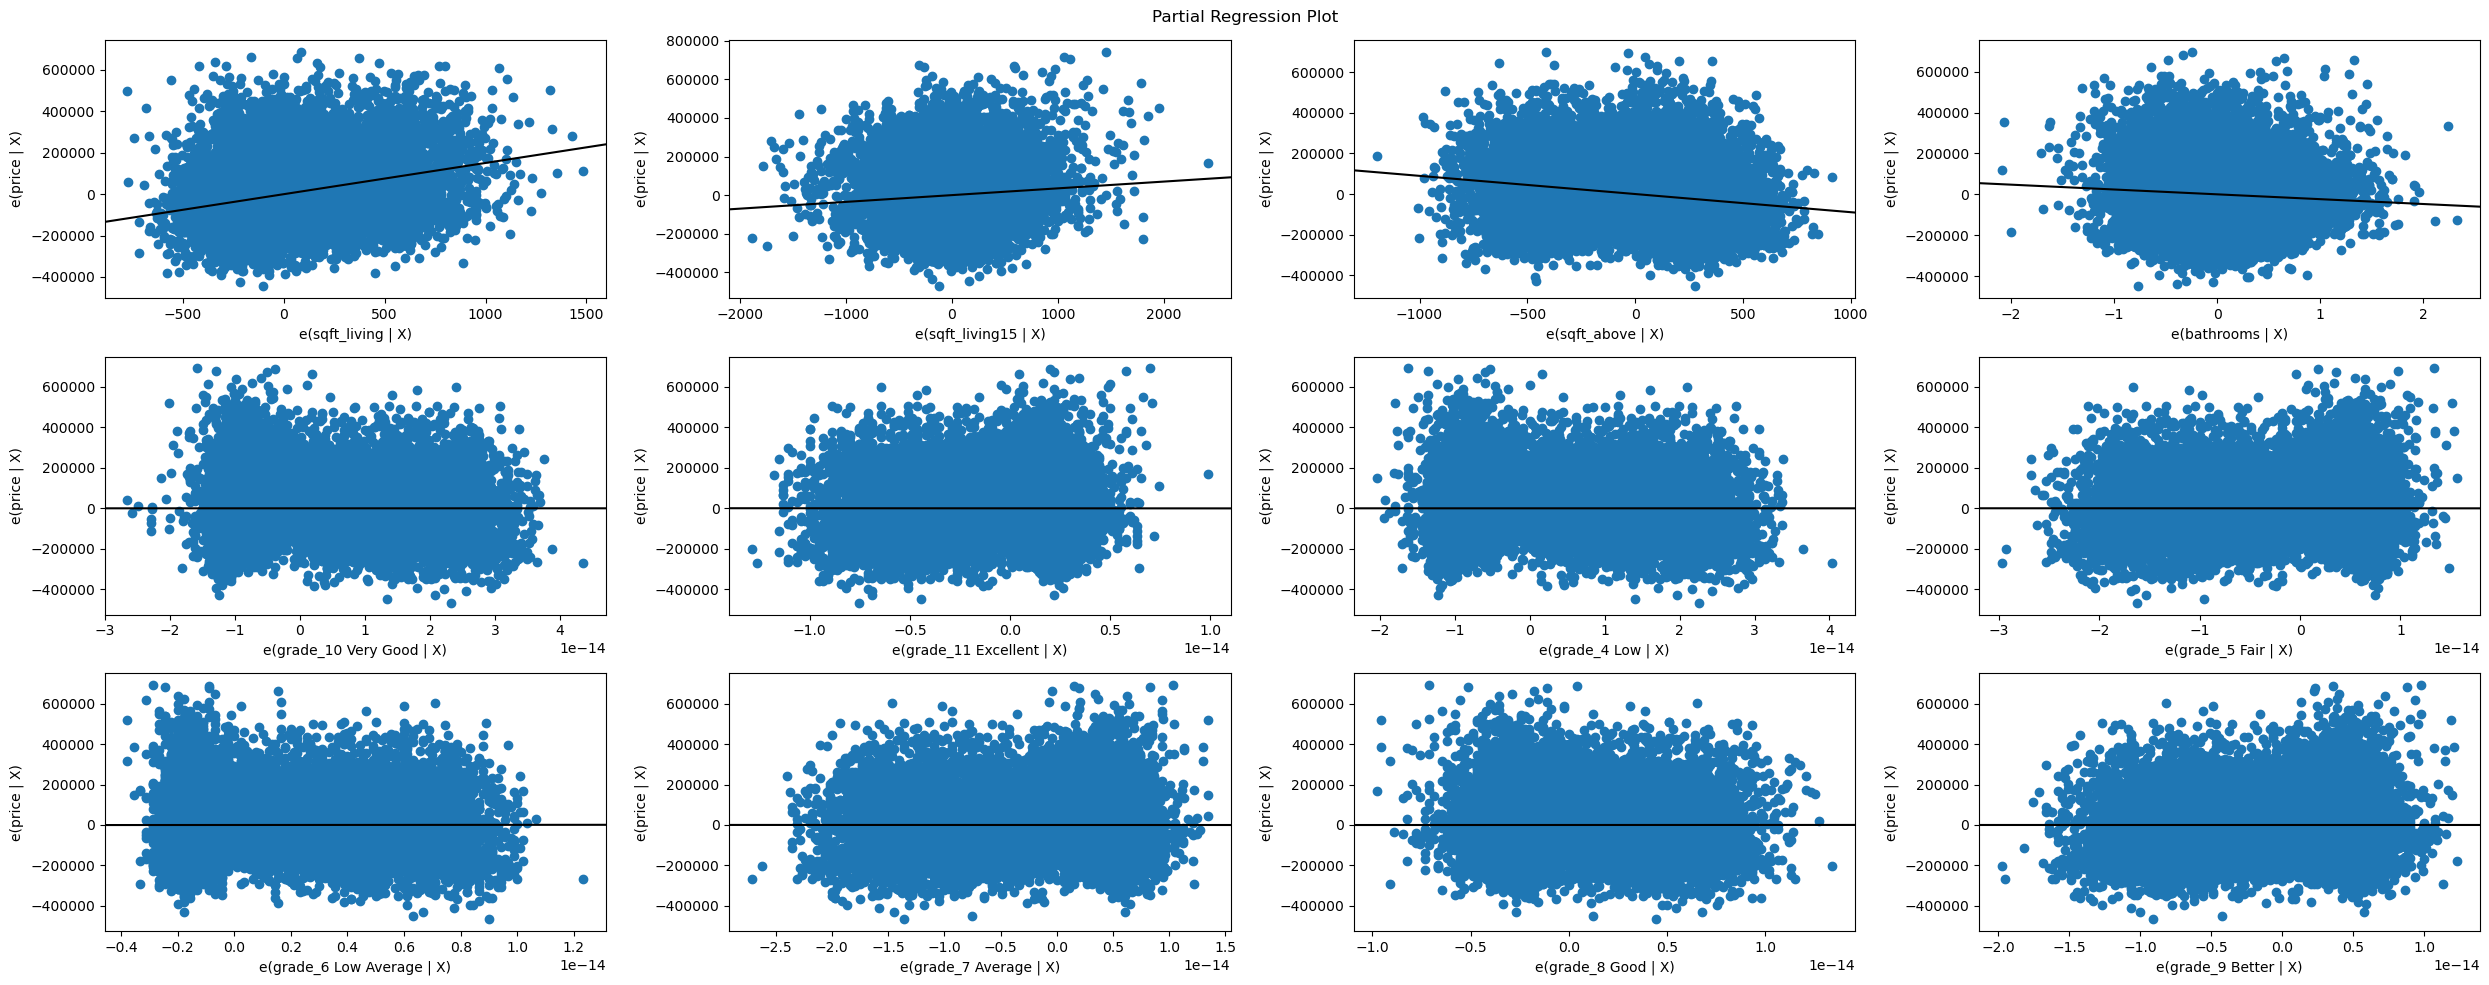

In [77]:
#plot the partial regression plots for our predictors
fig = plt.figure(figsize=(25,10))
sm.graphics.plot_partregress_grid(multiple1_results, exog_idx=["sqft_living","sqft_living15","sqft_above","bathrooms","grade_10 Very Good","grade_11 Excellent","grade_4 Low","grade_5 Fair","grade_6 Low Average","grade_7 Average","grade_8 Good","grade_9 Better"], 
                                  grid=(3,4),fig=fig)
plt.show();